In [1]:
%pip install diagrams

  Using cached diagrams-0.24.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.0 kB)
Using cached diagrams-0.24.1-py3-none-any.whl (25.1 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


# Simple web diagram

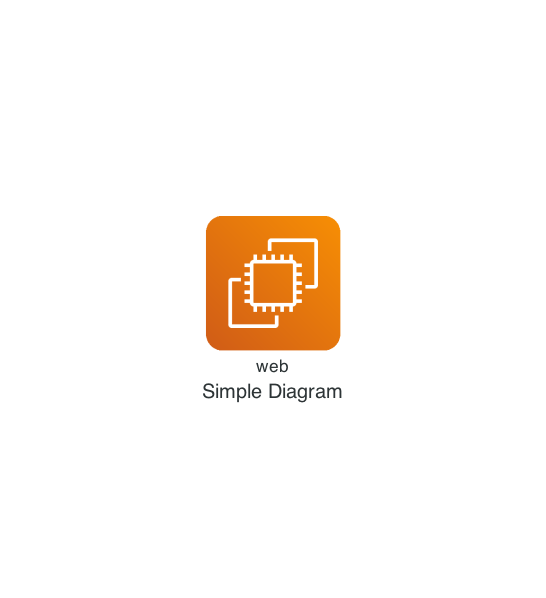

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram") as diag:
    EC2("web")
diag

# Diagram with nodes

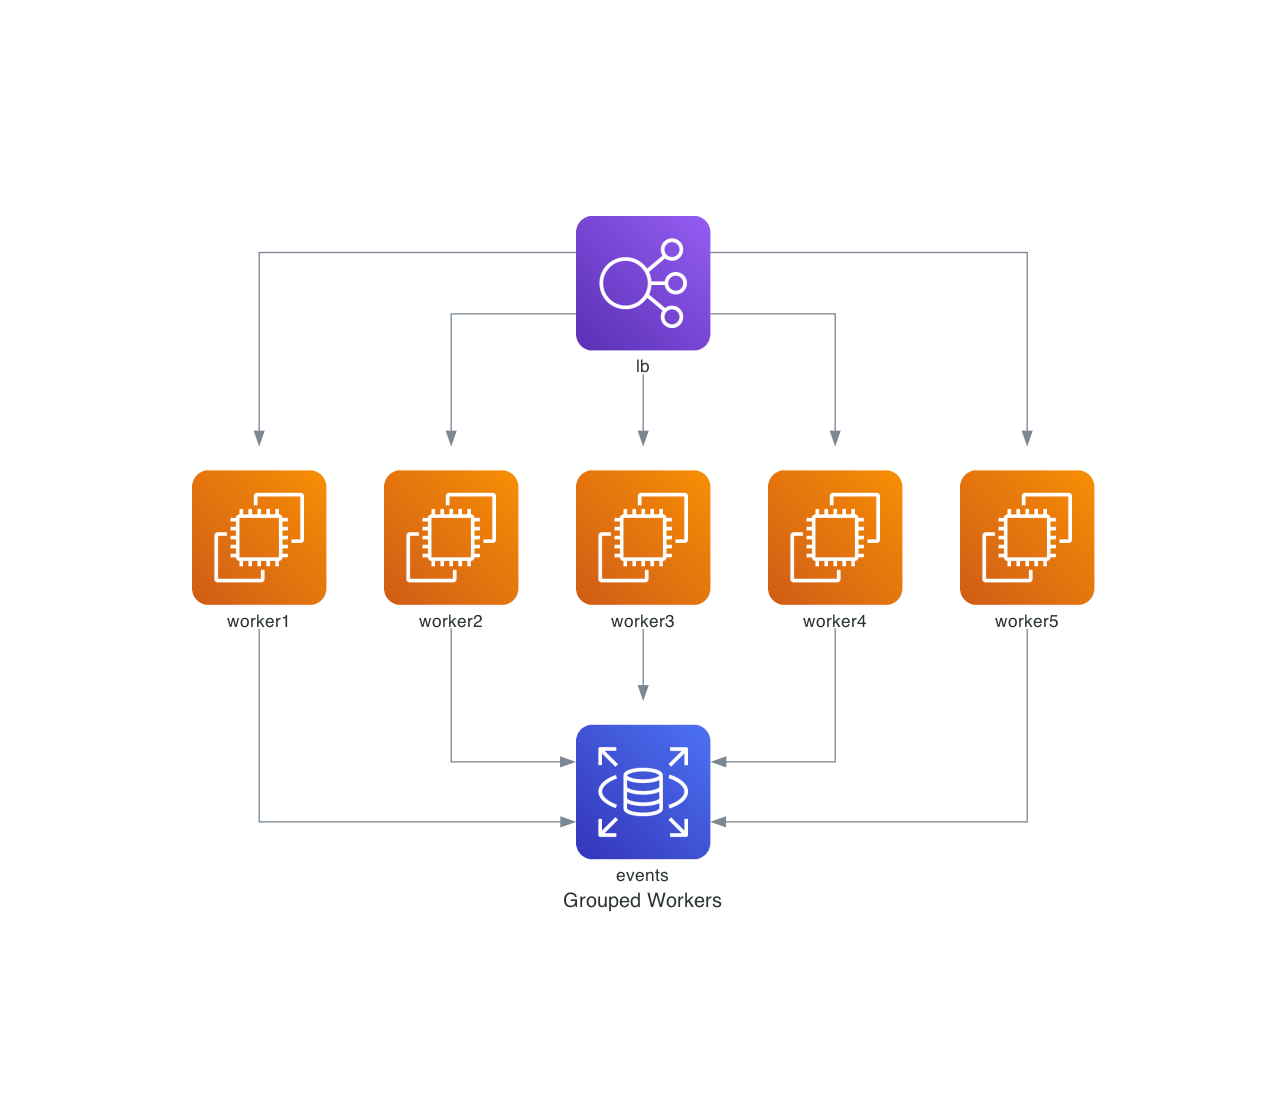

In [16]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB") as diag:
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")
diag

# Diagrams with clusters

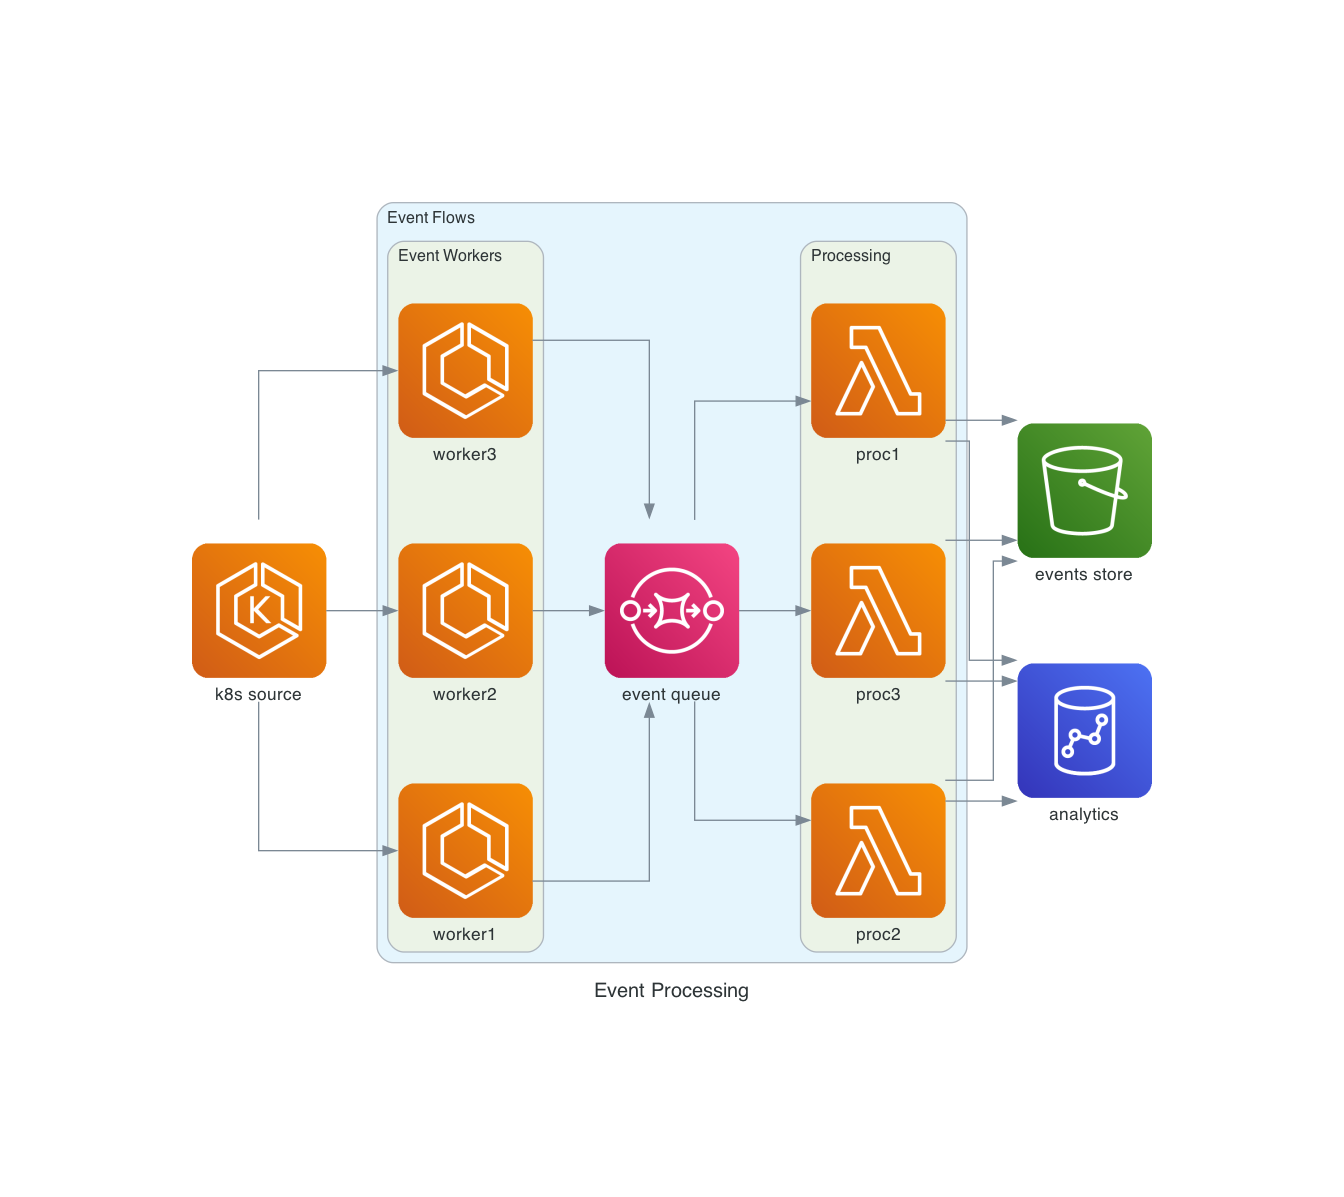

In [20]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=True) as diag:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
diag

# Diagrams with custom images

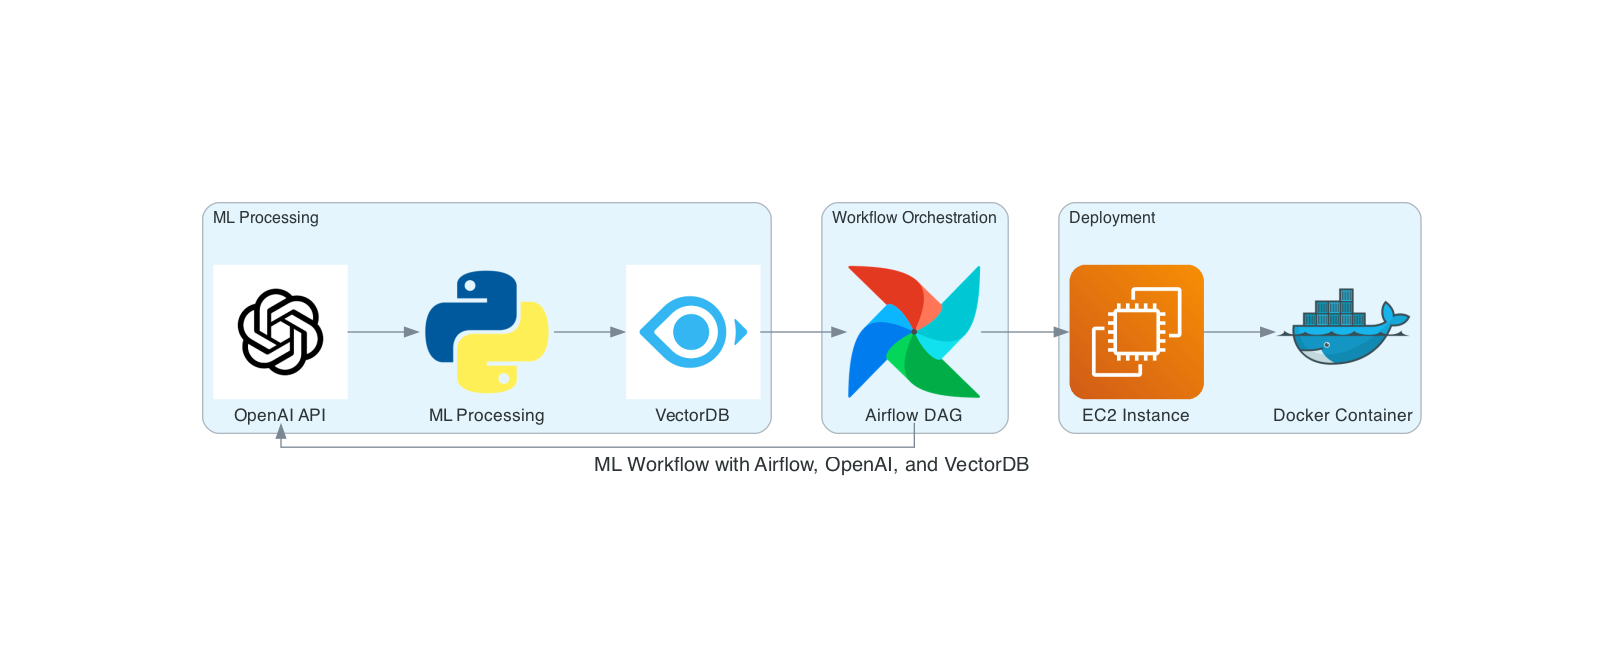

In [12]:
from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.onprem.workflow import Airflow
from diagrams.programming.language import Python
from diagrams.aws.compute import EC2
from diagrams.onprem.container import Docker

# Path to a custom OpenAI logo (download and place it in the same directory)
openai_logo_path = "openai.png"
milvus_path="milvus.png"

with Diagram("ML Workflow with Airflow, OpenAI, and VectorDB", show=True) as diag1:
    with Cluster("Workflow Orchestration"):
        airflow = Airflow("Airflow DAG")
    
    with Cluster("ML Processing"):
        openai = Custom("OpenAI API", openai_logo_path)
        vectordb = Custom("VectorDB",milvus_path)
        ml_processing = Python("ML Processing")

    with Cluster("Deployment"):
        ec2 = EC2("EC2 Instance")
        docker = Docker("Docker Container")

    airflow >> openai
    openai >> ml_processing
    ml_processing >> vectordb
    vectordb >> airflow
    airflow >> ec2
    ec2 >> docker

diag1


# Diagram with edges

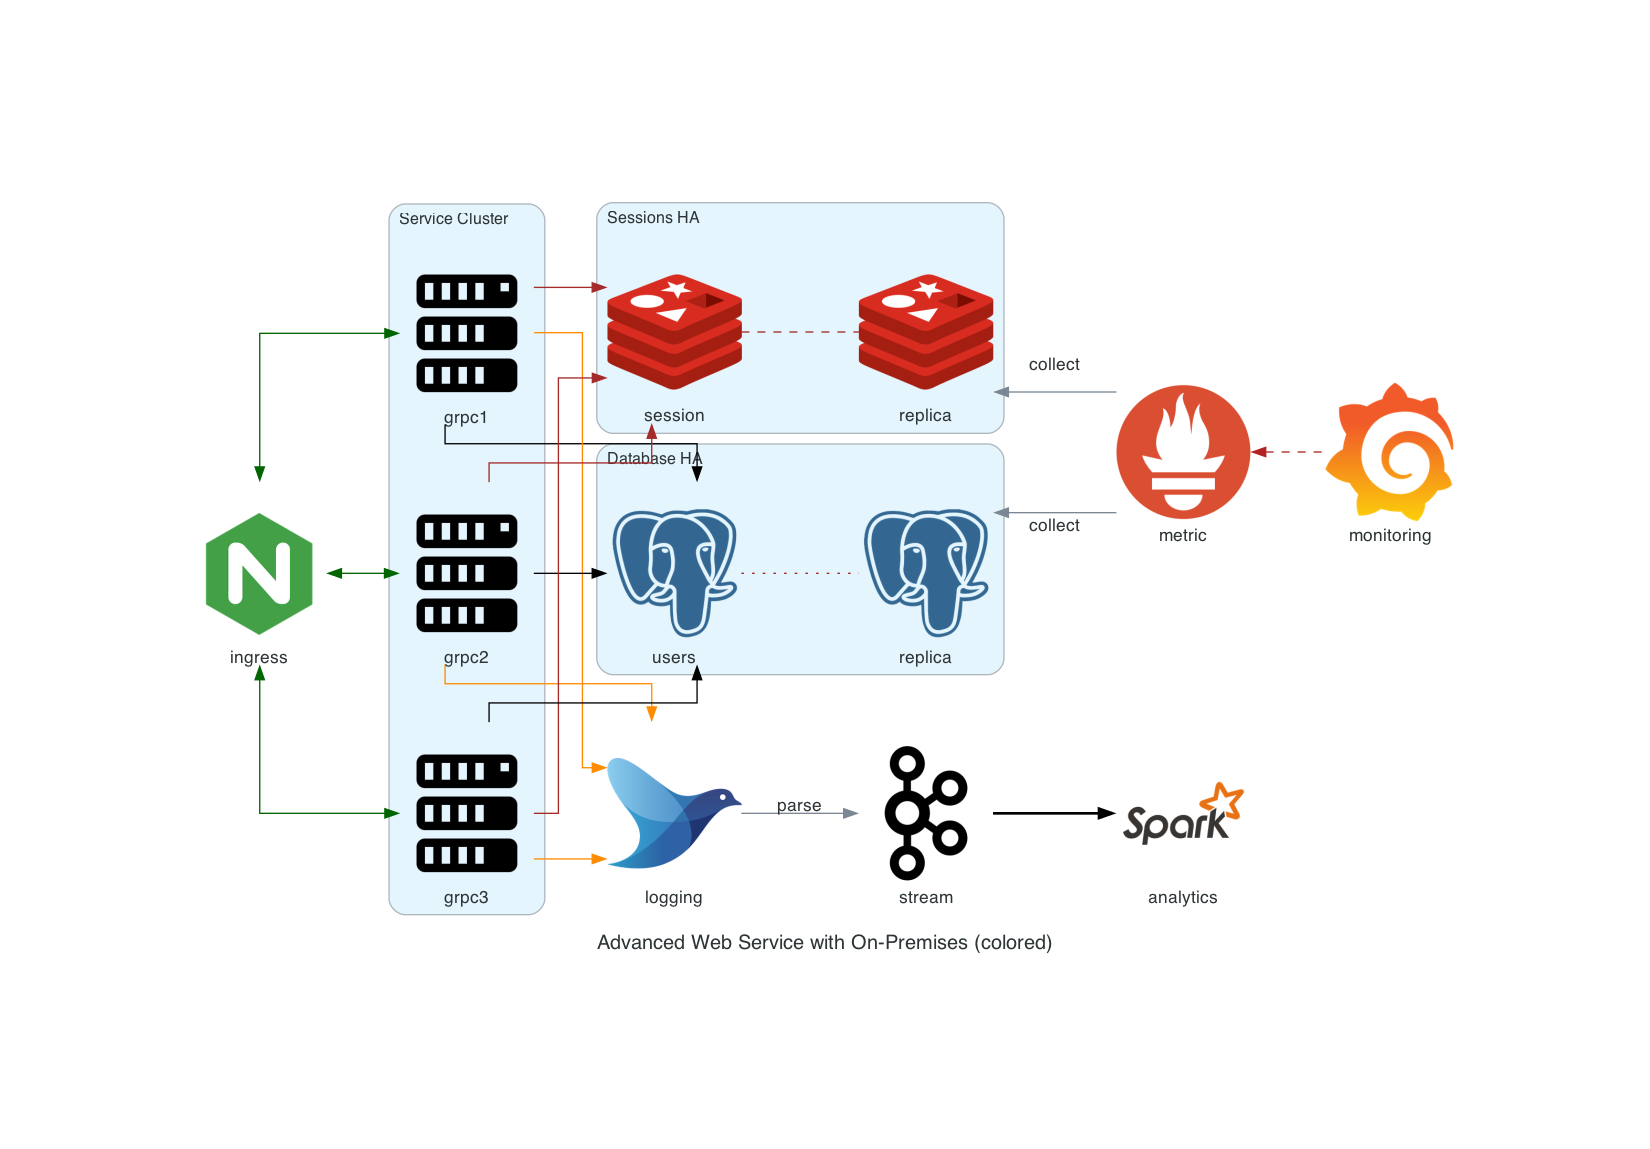

In [19]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premises (colored)", show=True) as diag2:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary \
            - Edge(color="brown", style="dashed") \
            - Redis("replica") \
            << Edge(label="collect") \
            << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary \
            - Edge(color="brown", style="dotted") \
            - PostgreSQL("replica") \
            << Edge(label="collect") \
            << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator \
        >> Edge(label="parse") \
        >> Kafka("stream") \
        >> Edge(color="black", style="bold") \
        >> Spark("analytics")

    ingress \
        >> Edge(color="darkgreen") \
        << grpcsvc \
        >> Edge(color="darkorange") \
        >> aggregator
diag2